<a href="https://colab.research.google.com/github/rajeshkpandey/AWESOME-FER/blob/master/Epidemics_ABM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

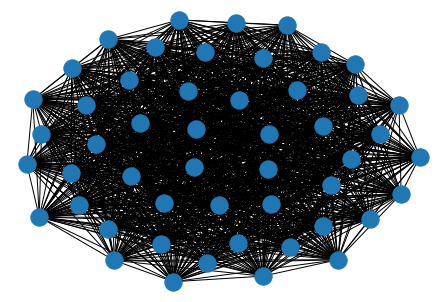

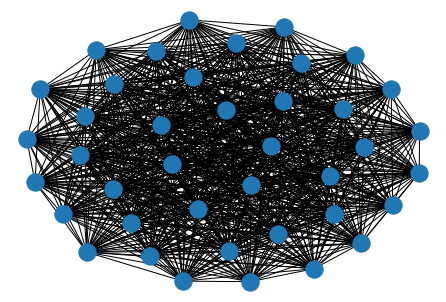

In [1]:
#Erdos-Renyi Graph in Networkx
import random
import copy
from networkx import nx
import matplotlib.pyplot as plt

N = 50  # 50 Indian Cities
K = 10000  # 10000 Agents(people under observation on SIR modeling)
#M = 30  # 30 Edges
NN = 40 # 50 nodes contact network of Cities


#Graph = nx.gnm_random_graph(N, M)

P = 1 #Probabibilty for Node Connection in random graph
PP = 1
Graph = nx.erdos_renyi_graph(N,P) # Use Networkx to generate a random graph of N nodes being connected with probability P.
GraphN = nx.erdos_renyi_graph(NN,PP)


# some network properties
#print("the adjacency list")
#for line in nx.generate_adjlist(Graph):
#    print(line)

nx.draw(Graph)
plt.show()
nx.draw(GraphN)
plt.show()

In [2]:
#!jupyter notebook --generate-config

In [3]:
#%%writefile /root/.jupyter/jupyter_notebook_config.py
#NotebookApp.iopub_data_rate_limit =
#NotebookApp.rate_limit_window =

In [4]:
#%pycat /root/.jupyter/jupyter_notebook_config.py

In [5]:
A = nx.adjacency_matrix(Graph)
Adjacency_matrix = A.todense()
AN = nx.adjacency_matrix(GraphN)
Adjacency_matrixN = AN.todense()
print(Adjacency_matrix)
print(Adjacency_matrixN)

[[0 1 1 ... 1 1 1]
 [1 0 1 ... 1 1 1]
 [1 1 0 ... 1 1 1]
 ...
 [1 1 1 ... 0 1 1]
 [1 1 1 ... 1 0 1]
 [1 1 1 ... 1 1 0]]
[[0 1 1 ... 1 1 1]
 [1 0 1 ... 1 1 1]
 [1 1 0 ... 1 1 1]
 ...
 [1 1 1 ... 0 1 1]
 [1 1 1 ... 1 0 1]
 [1 1 1 ... 1 1 0]]


In [6]:
#Empty Node Dictionary [ A Dictionary consisting list of agent states on Graph Nodes]
Node = {}
print(Node)
for i in range(N):
  for j in range(NN):
    Node[i*NN+j] = list()
#print(Node)
print(len(Node))


{}
2000


In [7]:
#Adding Viral_Index Randomly
for i in range(N):
  for j in range(NN):
    Viral_load=0
    Node[i*NN+j].append({'Viral_load' : Viral_load})
    Node[i*NN+j].append({'S' : 0})
    Node[i*NN+j].append({'I' : 0})
    Node[i*NN+j].append({'R' : 0})
#print(Node)
print(len(Node))


2000


In [8]:
#Initailizing randomly infection state [0 shows Susceptible, 1 shows Infected, and 2 shows Recovered]
Agent = {}
for k in range(K):
  Agent[k] = list() 
for k in range(K):
  Rand_node=random.randint(0,N-1)
  Neighbors = list(Graph.neighbors(Rand_node))
  Rand_nodeN=random.randint(0,NN-1)
  First_nodeN = random.randint(0,NN-1)
  Second_nodeN = random.randint(0,NN-1)
  Rand_state=random.choices([0,1],weights=(98,2),k=1)[0]
  Rand_neighbors = list(GraphN.neighbors(Rand_nodeN))
  Rand_neighbors1 = list(GraphN.neighbors(First_nodeN))
  Rand_neighbors2 = list(GraphN.neighbors(Second_nodeN))
  if len(Rand_neighbors) > 0:
    Rand_nodeN1=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN1)
  else:
    Rand_nodeN1=Rand_nodeN
  
  if len(Rand_neighbors) > 0:
    Rand_nodeN2=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN2)
    if Rand_nodeN2 not in list(GraphN.neighbors(Rand_nodeN1)):
      Rand_nodeN2=Rand_nodeN1
  else:
    Rand_nodeN2=Rand_nodeN1
  
  if Rand_state == 0:
    Node[Rand_node*NN+Rand_nodeN][1]['S']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
    Agent[k].append({'State' : Rand_state})
  elif Rand_state == 1:
    Node[Rand_node*NN+Rand_nodeN][2]['I']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state, 'V_l' : 1})
    Agent[k].append({'State' : Rand_state, 'V_l' : 1 })
  else:
    Node[Rand_node*NN+Rand_nodeN][3]['R']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
    Agent[k].append({'State' : Rand_state})

  #Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
  #Agent[k].append({'State' : Rand_state})
  Agent[k].append({'Home_node' : Rand_node})
  Agent[k].append({'Home_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
  
  if len(Neighbors) > 0:
    First_node = random.choice(Neighbors)
    Neighbors.remove(First_node)
  else:
    First_node = Rand_node
  if len(Neighbors) > 0:
    Second_node = random.choice(Neighbors)
  else:
    Second_node = Rand_node

  if len(Rand_neighbors1) > 0:
    First_nodeN1=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN1)
  else:
    First_nodeN1=First_nodeN
  
  if len(Rand_neighbors1) > 0:
    First_nodeN2=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN2)
    if First_nodeN2 not in list(GraphN.neighbors(First_nodeN1)):
      First_nodeN2=First_nodeN1
  else:
    First_nodeN2=First_nodeN1

  if len(Rand_neighbors2) > 0:
    Second_nodeN1=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN1)
  else:
    Second_nodeN1=Second_nodeN
  
  if len(Rand_neighbors2) > 0:
    Second_nodeN2=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN2)
    if Second_nodeN2 not in list(GraphN.neighbors(Second_nodeN1)):
      Second_nodeN2=Second_nodeN1
  else:
    Second_nodeN2=Second_nodeN1

  Agent[k].append({'First_node' : First_node})
  Agent[k].append({'First_nodeN' : [First_nodeN, First_nodeN1, First_nodeN2]})
  Agent[k].append({'Second_node' : Second_node})
  Agent[k].append({'Second_nodeN' : [Second_nodeN, Second_nodeN1, Second_nodeN2]})
  Agent[k].append({'Current_node' : Rand_node})
  Agent[k].append({'Current_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
#print(Node)
#print(Agent)

In [9]:
print(len(Graph.nodes))
print(len(GraphN.nodes))

50
40


In [10]:
#Random Walk Implementation
def random_walk(Graph=Graph, GraphN=GraphN, Node=Node, Agent=Agent, num_walks=1, num_steps=1):
    walks = list()
    Node_next = {}
    Agent_next = {}
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j] = list() 
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j].append({'Viral_load' : copy.deepcopy(Node[i*len(GraphN.nodes)+j][0]['Viral_load'])/2})
        Node_next[i*len(GraphN.nodes)+j].append({'S' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'I' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'R' : 0})
    for i in range(len(Agent)):
      Agent_next[i] = list()
    Agent_next = copy.deepcopy(Agent)
    count_nomove=0
    count_move_first=0
    count_move_second=0
    count_stay_home=0
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        for agent in list(range(4,len(Node[i*len(GraphN.nodes)+j]))):
          a_id = list(Node[i*len(GraphN.nodes)+j][agent].keys())[0]
          #print(a_id)
          #print(Agent[a_id])
          for walk in range(num_walks):
              curr_walk = [i*len(GraphN.nodes)+j]
              cur = i*len(GraphN.nodes)+j
              for step in range(num_steps):
                  neighbors = []
                  #if Agent_next[a_id][1]['Home_node'] in Graph.neighbors(Agent_next[a_id][7]['Current_node']):
                  neighbors.append(Agent_next[a_id][1]['Home_node'])
                  #if Agent_next[a_id][3]['First_node'] in Graph.neighbors(Agent_next[a_id][7]['Current_node']):
                  neighbors.append(Agent[a_id][3]['First_node'])
                  #if Agent_next[a_id][5]['Second_node'] in Graph.neighbors(Agent_next[a_id][7]['Current_node']) :
                  neighbors.append(Agent_next[a_id][5]['Second_node'])

                  if len(neighbors) > 0:
                      if len(neighbors) == 3:
                        PN=(1/(Node[cur][2]['I'] + 1))
                        P = 100-PN 
                        #print(P)
                        #print(PN)
                        next = random.choices(neighbors,weights=(P,PN/2,PN/2), k=1)[0] 
                      elif len(neighbors) == 2:
                        next = random.choices(neighbors,weights=(P,PN), k=1)[0]
                      else:
                        next = random.choices(neighbors,weights=(100), k=1)[0]
                      #next = random.choice(neighbors)
                      if next == Agent_next[a_id][7]['Current_node']:
                        #print("no movement")
                        count_nomove+=1

                      else:
                        if next == Agent_next[a_id][3]['First_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][3]['First_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][4]['First_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][4]['First_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][4]['First_nodeN'][2]
                          count_move_first+=1
                        elif next == Agent_next[a_id][5]['Second_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][5]['Second_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][6]['Second_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][6]['Second_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][6]['Second_nodeN'][2]
                          count_move_second+=1
                        elif next == Agent_next[a_id][1]['Home_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][1]['Home_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][2]['Home_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][2]['Home_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][2]['Home_nodeN'][2]
                          count_stay_home+=1
                      PN1=(1/(Node[cur][2]['I'] + 1))
                      P1 = 100-PN1  
                      nextn = random.choices(Agent_next[a_id][8]['Current_nodeN'],weights=(P1,PN1/2,PN1/2),k=1)[0]
                      if nextn == Agent_next[a_id][8]['Current_nodeN'][1]:
                        Agent_next[a_id][8]['Current_nodeN'][1],Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][8]['Current_nodeN'][0],Agent_next[a_id][8]['Current_nodeN'][1]
                      elif nextn == Agent_next[a_id][8]['Current_nodeN'][2] :
                        Agent_next[a_id][8]['Current_nodeN'][2],Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][8]['Current_nodeN'][0],Agent_next[a_id][8]['Current_nodeN'][2]
                      else:
                        Agent_next[a_id][8]['Current_nodeN'][0]=Agent_next[a_id][8]['Current_nodeN'][0]                      
                  nex = next*len(GraphN.nodes)+nextn
          Node_next[nex].append(copy.deepcopy(Node[cur][agent]))
          if Node[cur][agent][a_id] == 0:
            Node_next[nex][1]['S']+=1
          elif Node[cur][agent][a_id] == 1:
            Node_next[nex][2]['I']+=1
            Node_next[nex][-1]['V_l']/=2
            Node_next[nex][0]['Viral_load']+=1
            if nex != cur:
              Node_next[cur][0]['Viral_load']+=1
          elif Node[cur][agent][a_id] == 2:
            Node_next[nex][3]['R']+=1

          curr_walk.append(nex)
          #print(Agent[a_id])
          #print(curr_walk)
          walks.append(nex)
    #print(Node_next)
    #print(Agent_next)

    #State-transition-logic
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        count_SI=0
        count_IR=0
        W1 = Node_next[i*len(GraphN.nodes)+j][2]['I'] + Node_next[i*len(GraphN.nodes)+j][0]['Viral_load']
        W2 = Node_next[i*len(GraphN.nodes)+j][1]['S'] + Node_next[i*len(GraphN.nodes)+j][3]['R'] - 1
        for agent in list(range(4,len(Node_next[i*len(GraphN.nodes)+j]))):
          a_id = list(Node_next[i*len(GraphN.nodes)+j][agent].keys())[0]
          if Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 0:
            Node_next[i*len(GraphN.nodes)+j][agent][a_id] = random.choices([1,0], weights=(W1,W2), k=1)[0] 
            if Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 1:
              count_SI+=1
              Node_next[i*len(GraphN.nodes)+j][agent].update({'V_l' : 1})
              Agent_next[a_id][0]['State'] = 1
          elif Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 1:
            if Node_next[i*len(GraphN.nodes)+j][agent]['V_l'] < .01:
              Node_next[i*len(GraphN.nodes)+j][agent][a_id] = 2
              count_IR+=1
              Agent_next[a_id][0]['State'] = 2
              Node_next[i*len(GraphN.nodes)+j][agent].pop('V_l') 
        Node_next[i*len(GraphN.nodes)+j][1]['S']-=count_SI
        Node_next[i*len(GraphN.nodes)+j][2]['I']+=(count_SI - count_IR)
        Node_next[i*len(GraphN.nodes)+j][3]['R']+=count_IR 
         
    #print("count_no_movements",count_nomove)
    #print("count_movements_firstnode",count_move_first)
    #print("count_movements_secondnode",count_move_second)
    #print("count_stay_homenode",count_stay_home)  
    return Node,Node_next,Agent,Agent_next

In [11]:
def Count_SIR_Node(Node=Node):
  count_S=0
  count_I=0
  count_R=0
  for i in range(len(Node)):
    count_S+=Node[i][1]['S'] 
    count_I+=Node[i][2]['I']
    count_R+=Node[i][3]['R'] 
  return count_S,count_I,count_R

In [12]:
def Count_SIR_Agent(Agent=Agent):
  count_S=0
  count_I=0
  count_R=0
  for i in range(len(Agent)):
    if Agent[i][0]['State'] == 0:
      count_S+=1
    elif Agent[i][0]['State'] == 1:
      count_I+=1
    elif Agent[i][0]['State'] == 2:
      count_R+=1
  return count_S,count_I,count_R 

[9781, 9435, 9020, 8757, 8665, 8607, 8541, 8468, 8411, 8348, 8274, 8212, 8152, 8105, 8073, 8048, 8021, 7983, 7943, 7922, 7892, 7871, 7850, 7829, 7809, 7797, 7786, 7769, 7748, 7729, 7710, 7700, 7692, 7683, 7670, 7653, 7635, 7629, 7627, 7626, 7625, 7618, 7617, 7615, 7612, 7611, 7609, 7606, 7603, 7601, 7600, 7600, 7600, 7599, 7598, 7597, 7596, 7591, 7588, 7587, 7585, 7583, 7583, 7582, 7582, 7582, 7582, 7582, 7578, 7576, 7575, 7574, 7573, 7571, 7568, 7568, 7567, 7565, 7564, 7560, 7557, 7556, 7556, 7554, 7552, 7551, 7550, 7549, 7548, 7547, 7543, 7541, 7540, 7539, 7539, 7539, 7539, 7537, 7534, 7533, 7533, 7532, 7531, 7529, 7527, 7527, 7526, 7526, 7526, 7525, 7520, 7517, 7517, 7516, 7515, 7515, 7515, 7515, 7514, 7514, 7514, 7514, 7514, 7512, 7512, 7512, 7512, 7510, 7509, 7509, 7509, 7508, 7507, 7507, 7506, 7506, 7506, 7505, 7503, 7500, 7499, 7497, 7496, 7496, 7495, 7494, 7491, 7487, 7487, 7487, 7487, 7486, 7484, 7483, 7480, 7479, 7478, 7477, 7477, 7477, 7477, 7476, 7475, 7475, 7475, 7474, 747

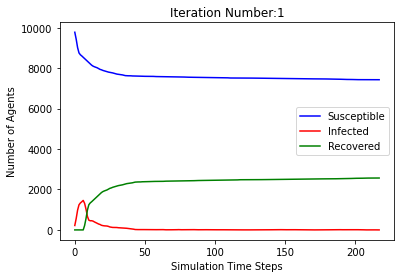

[9781, 9425, 8984, 8754, 8661, 8581, 8479, 8358, 8242, 8183, 8118, 8052, 7987, 7919, 7865, 7833, 7806, 7784, 7756, 7726, 7697, 7675, 7661, 7651, 7648, 7644, 7642, 7638, 7633, 7626, 7622, 7618, 7615, 7612, 7606, 7603, 7602, 7599, 7598, 7597, 7597, 7597, 7596, 7596, 7596, 7596, 7595, 7595, 7595, 7595, 7595, 7595, 7595, 7595]
[219, 575, 1016, 1246, 1339, 1419, 1521, 1423, 1183, 801, 636, 609, 594, 560, 493, 409, 377, 334, 296, 261, 222, 190, 172, 155, 136, 112, 84, 59, 42, 35, 29, 30, 29, 30, 32, 30, 24, 23, 20, 18, 15, 9, 7, 6, 3, 2, 2, 2, 2, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 219, 575, 1016, 1246, 1339, 1419, 1521, 1642, 1758, 1817, 1882, 1948, 2013, 2081, 2135, 2167, 2194, 2216, 2244, 2274, 2303, 2325, 2339, 2349, 2352, 2356, 2358, 2362, 2367, 2374, 2378, 2382, 2385, 2388, 2394, 2397, 2398, 2401, 2402, 2403, 2403, 2403, 2404, 2404, 2404, 2404, 2405]
[[], [9781, 9435, 9020, 8757, 8665, 8607, 8541, 8468, 8411, 8348, 8274, 8212, 8152, 8105, 8073, 8048, 8021, 7983, 7943, 7922, 7892, 7871

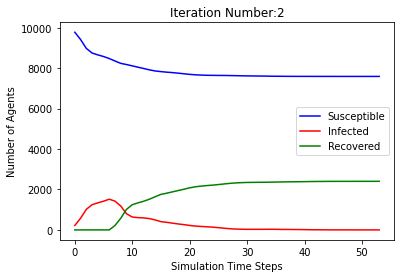

[9781, 9432, 9008, 8748, 8625, 8511, 8421, 8334, 8236, 8136, 8037, 7944, 7872, 7809, 7746, 7683, 7613, 7565, 7531, 7505, 7485, 7456, 7424, 7394, 7373, 7341, 7317, 7297, 7278, 7256, 7248, 7241, 7234, 7228, 7225, 7218, 7209, 7201, 7182, 7170, 7160, 7154, 7148, 7143, 7140, 7135, 7131, 7128, 7123, 7118, 7115, 7113, 7106, 7101, 7098, 7095, 7093, 7090, 7088, 7084, 7080, 7078, 7076, 7076, 7076, 7075, 7075, 7074, 7074, 7072, 7072, 7068, 7065, 7063, 7062, 7062, 7062, 7062, 7062, 7061, 7060, 7060, 7059, 7059, 7058, 7057, 7056, 7053, 7050, 7047, 7046, 7044, 7044, 7044, 7044, 7042, 7039, 7033, 7032, 7032, 7032, 7031, 7029, 7028, 7027, 7026, 7026, 7026, 7025, 7024, 7023, 7020, 7019, 7019, 7017, 7013, 7010, 7008, 7001, 6997, 6991, 6987, 6985, 6985, 6984, 6981, 6980, 6973, 6964, 6957, 6949, 6941, 6936, 6928, 6924, 6920, 6919, 6917, 6911, 6908, 6907, 6905, 6903, 6901, 6895, 6893, 6892, 6889, 6886, 6886, 6885, 6884, 6883, 6883, 6882, 6881, 6879, 6877, 6875, 6875, 6874, 6872, 6871, 6868, 6867, 6867, 686

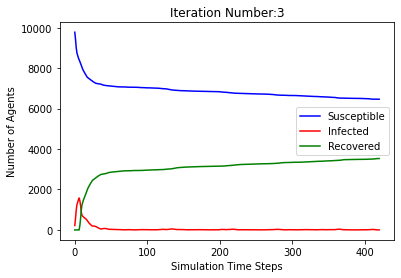

[9781, 9446, 9030, 8753, 8636, 8549, 8455, 8355, 8273, 8194, 8139, 8098, 8066, 8036, 7999, 7959, 7930, 7916, 7893, 7866, 7849, 7833, 7821, 7814, 7802, 7791, 7778, 7771, 7764, 7752, 7738, 7726, 7717, 7709, 7698, 7689, 7681, 7674, 7673, 7672, 7671, 7666, 7658, 7653, 7644, 7640, 7635, 7631, 7629, 7623, 7622, 7621, 7619, 7619, 7619, 7619, 7617, 7616, 7616, 7615, 7613, 7613, 7610, 7608, 7608, 7608, 7607, 7606, 7606, 7602, 7602, 7602, 7602, 7602, 7602, 7602, 7602]
[219, 554, 970, 1247, 1364, 1451, 1545, 1426, 1173, 836, 614, 538, 483, 419, 356, 314, 264, 223, 205, 200, 187, 166, 138, 116, 114, 102, 88, 78, 69, 69, 76, 76, 74, 69, 73, 75, 71, 64, 53, 45, 38, 32, 31, 28, 30, 33, 37, 40, 37, 35, 31, 23, 21, 16, 12, 10, 6, 6, 5, 4, 6, 6, 9, 9, 8, 8, 8, 7, 7, 8, 6, 6, 6, 5, 4, 4, 0]
[0, 0, 0, 0, 0, 0, 0, 219, 554, 970, 1247, 1364, 1451, 1545, 1645, 1727, 1806, 1861, 1902, 1934, 1964, 2001, 2041, 2070, 2084, 2107, 2134, 2151, 2167, 2179, 2186, 2198, 2209, 2222, 2229, 2236, 2248, 2262, 2274, 2283, 

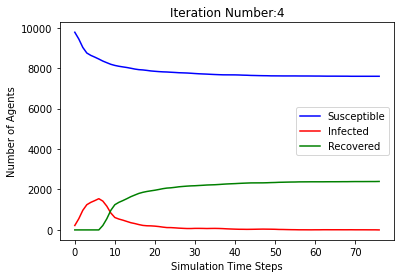

[9781, 9444, 9016, 8765, 8634, 8544, 8449, 8370, 8276, 8189, 8109, 8032, 7965, 7900, 7821, 7760, 7710, 7681, 7651, 7615, 7590, 7560, 7538, 7514, 7496, 7475, 7471, 7463, 7459, 7449, 7440, 7434, 7430, 7425, 7422, 7416, 7409, 7401, 7396, 7390, 7387, 7380, 7378, 7376, 7376, 7376, 7375, 7375, 7375, 7375, 7375, 7375, 7375, 7375]
[219, 556, 984, 1235, 1366, 1456, 1551, 1411, 1168, 827, 656, 602, 579, 549, 549, 516, 479, 428, 381, 350, 310, 261, 222, 196, 185, 176, 144, 127, 101, 89, 74, 62, 45, 46, 41, 43, 40, 39, 38, 40, 38, 42, 38, 33, 25, 20, 15, 12, 5, 3, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 219, 556, 984, 1235, 1366, 1456, 1551, 1630, 1724, 1811, 1891, 1968, 2035, 2100, 2179, 2240, 2290, 2319, 2349, 2385, 2410, 2440, 2462, 2486, 2504, 2525, 2529, 2537, 2541, 2551, 2560, 2566, 2570, 2575, 2578, 2584, 2591, 2599, 2604, 2610, 2613, 2620, 2622, 2624, 2624, 2624, 2625]
[[], [9781, 9435, 9020, 8757, 8665, 8607, 8541, 8468, 8411, 8348, 8274, 8212, 8152, 8105, 8073, 8048, 8021, 7983, 7943, 7922, 78

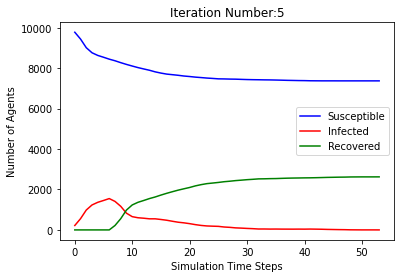

In [13]:
#from numpy import zeros, linspace
#Node_p=Node.copy()
#Node_n=Node.copy() 
#Agent_p=Agent.copy()
#Agent_n=Agent.copy()
#print(Node_p)
#print(Agent_p)
#S,I,R = Count_SIR_Node(Node_n) 
#S1,I1,R1 = Count_SIR_Agent(Agent_n)
#print([S,I,R]) 
#print([S1,I1,R1])
SS,II,RR,TT = [[]],[[]],[[]],[[]]
for i in range(5):
  j=0
  Node_p=Node.copy()
  Node_n=Node.copy() 
  Agent_p=Agent.copy()
  Agent_n=Agent.copy()
  Sj,Ij,Rj = Count_SIR_Node(Node_n) 
  #print([Sj,Ij,Rj]) 
  S,I,R,T = [],[],[],[]
  S.append(Sj)
  I.append(Ij)
  R.append(Rj)
  T.append(j)

  while Ij > 0 :
    Node_p,Node_n,Agent_p,Agent_n = random_walk(Graph,GraphN,Node_n,Agent_n,1,1)
    j+=1 
    #count=0
    #for i in range(len(Node_p)):
    #  count+=len(Node_p[i]) - 4
    #print(count)
    Sj,Ij,Rj = Count_SIR_Node(Node_n) 
    S.append(Sj)
    I.append(Ij)
    R.append(Rj)
    T.append(j)
    #S1,I1,R1 = Count_SIR_Agent(Agent_n)
    #print("Simulation No:",i+1, "Iteration No: ", j)
    #print(Node_n)
    #print(Agent_n)
    #print([Sj,Ij,Rj]) 
    # Plot the data on three separate curves for S(t), I(t) and R(t)
    #print([S1,I1,R1])
  print(S)
  print(I)
  print(R)
  SS.append(S)
  II.append(I)
  RR.append(R)
  TT.append(T)
  print(SS)
  print(II)
  print(RR)
  plt.plot(T, S, 'b', T, I, 'r', T, R, 'g')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Susceptible", "Infected", "Recovered"),loc='center right')
  plt.show()    

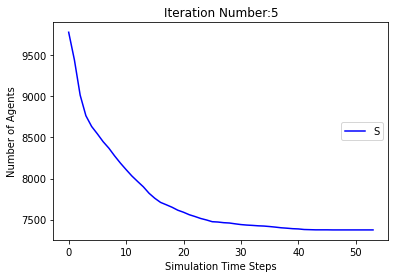

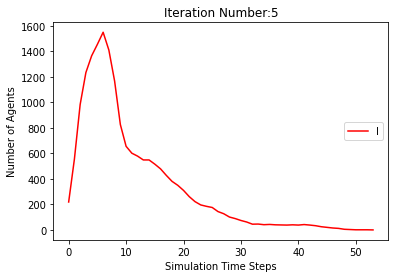

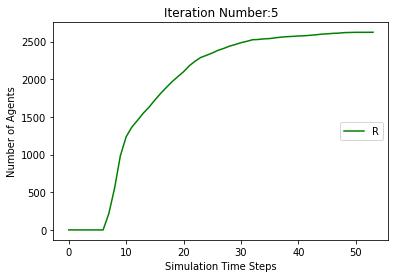

In [14]:
plt.plot(T, S, 'b')
plt.xlabel('Simulation Time Steps')
plt.title('Iteration Number:'+str(i+1))
plt.ylabel('Number of Agents')
plt.legend(("Susceptible"),loc='center right')
plt.show()

plt.plot(T, I, 'r')
plt.xlabel('Simulation Time Steps')
plt.title('Iteration Number:'+str(i+1))
plt.ylabel('Number of Agents')
plt.legend(("Infected"),loc='center right')
plt.show()

plt.plot(T, R, 'g')
plt.xlabel('Simulation Time Steps')
plt.title('Iteration Number:'+str(i+1))
plt.ylabel('Number of Agents')
plt.legend(("Recovered"),loc='center right')
plt.show()

In [15]:
print(len(SS[1]))

218


In [16]:
print(len(SS[2]))

54
